In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Objectives

The Hebb rule was one of the first neural network learning laws. It was proposed by Donald Hebb in 1949 as a possible mechanism for synaptic modification in the brain and has since been used to train artificial neural networks. In this chapter, we will use the linear algebra concepts of the previous two chapters to explain why Hebbian learning works. We will also show how the Hebb rule can be used to train neural networks for pattern recognition.

## Theory and Examples

Donald O. Hebb was born in Chester, Nova Scotia, just after the turn of the century. He originally planned to become a novelist, obtaining a degree in English from Dalhousie University in Halifax in 1925. Since every first-rate novelist needs to have a good understanding of human nature, he began to study Freud after graduation and became interested in psychology. He pursued a master’s degree in psychology at McGill University, where he wrote a thesis on Pavlovian conditioning. He received his Ph.D. from Harvard in 1936, where his dissertation investigated the effects of early experience on the vision of rats. 

Later, he joined the Montreal Neurological Institute, where he studied the extent of intellectual changes in brain surgery patients. In 1942, he moved to the Yerkes Laboratories of Primate Biology in Florida, where he studied chimpanzee behavior. In 1949, Hebb summarized his two decades of research in *The Organization of Behavior* [Hebb49]. The main premise of this book was that behavior could be explained by the action of neurons. This was in marked contrast to the behaviorist school of psychology (with proponents such as B. F. Skinner), which emphasized the correlation between stimulus and response and discouraged the use of any physiological hypotheses. 

Hebb stated his approach: 

> “The method then calls for learning as much as one can about what the parts of the brain do (primarily the physiologist’s field), and relating the behavior as far as possible to this knowledge (primarily for the psychologist); then seeing what further information is to be had about how the total brain works, from the discrepancy between (1) actual behavior and (2) the behavior that would be predicted from adding up what is known about the action of the various parts.”

The most famous idea contained in *The Organization of Behavior* was the postulate that came to be known as Hebbian learning:

**Hebb’s Postulate**: 

“When an axon of cell A is near enough to excite a cell B and repeatedly or persistently takes part in firing it, some growth process or metabolic change takes place in one or both cells such that A’s efficiency, as one of the cells firing B, is increased.”

This postulate suggested a physical mechanism for learning at the cellular level. Although Hebb never claimed to have firm physiological evidence for his theory, subsequent research has shown that some cells do exhibit Hebbian learning. Hebb’s theories continue to influence current research in neuroscience.

As with most historic ideas, Hebb’s postulate was not completely new, as he himself emphasized. It had been foreshadowed by several others, including Freud. Consider, for example, the following principle of association stated by psychologist and philosopher William James in 1890:

$$
\text{When two ideas are associated, they will tend to be recalled together.}
$$


## Linear Associator

Hebb’s learning law can be used in combination with a variety of neural network architectures. For our initial presentation of Hebbian learning, we will use a very simple architecture. This allows us to concentrate on the learning law rather than the architecture.

## Sociator Linear Associator

The network we will use is the sociator linear associator, as shown in **Figure 7.1**. This network was introduced independently by James Anderson [Ande72] and Teuvo Kohonen [Koho72].

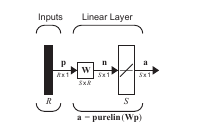
Fig. 1. Linear Associator

The output vector \( \mathbf{a} \) is determined from the input vector \( \mathbf{p} \) according to:

$$
\mathbf{a} = \mathbf{W} \mathbf{p} \tag{7.1}
$$

or, equivalently,

$$
a_i = \sum_{j=1}^{R} w_{ij} p_j \tag{7.2}
$$

where:
- $ \mathbf{W} $ is the weight matrix,
- $ R $ is the number of inputs,
- $ a_i $ is the $ i^{th} $ component of the output vector $ \mathbf{a} $,
- $ p_j $ is the $ j^{th} $ component of the input vector $ \mathbf{p} $.

## Associative Memory

The linear associator is an example of a type of neural network called an **associative memory**. The task of an associative memory is to learn $ Q $ pairs of prototype input/output vectors:

$$
\{ \mathbf{p}_1, \mathbf{t}_1 \}, \{ \mathbf{p}_2, \mathbf{t}_2 \}, \ldots, \{ \mathbf{p}_Q, \mathbf{t}_Q \} \tag{7.3}
$$

In other words, if the network receives an input $ \mathbf{p} = \mathbf{p}_q $, then it should produce an output $ \mathbf{a} = \mathbf{t}_q $ for $ q = 1, 2, \ldots, Q $.

Additionally, if the input is changed slightly (i.e., $ \mathbf{p} = \mathbf{p}_q + \delta $), then the output should only be changed slightly (i.e., $ \mathbf{a} = \mathbf{t}_q + \epsilon $).
## The Hebb Rule

How can we interpret Hebb’s postulate mathematically, so that we can use it to train the weight matrix of the linear associator? First, let’s rephrase the postulate: If two neurons on either side of a synapse are activated simultaneously, the strength of the synapse will increase. 

Notice from Eq. (7.2) that the connection (synapse) between input $ p_j $ and output $ a_i $ is the weight $ w_{ij} $. Therefore, Hebb’s postulate would imply that if a positive $ p_j $ produces a positive $ a_i $, then $ w_{ij} $ should increase. This suggests that one mathematical interpretation of the postulate could be:

## Hebb Rule

$$
w_{ij}^{\text{new}} = w_{ij}^{\text{old}} + \alpha f_i(a_{iq}) g_j(p_{jq}) \tag{7.4}
$$

where:
- $ p_{jq} $ is the $ j $-th element of the $ q $-th input vector $ \mathbf{p}_q $,
- $ a_{iq} $ is the $ i $-th element of the network output when the $ q $-th input vector is presented to the network,
- $ \alpha $ is a positive constant, called the learning rate.

This equation states that the change in the weight $ w_{ij} $ is proportional to a product of functions of the activities on either side of the synapse.

For this chapter, we will simplify Eq. (7.4) to the following form:

$$
w_{ij}^{\text{new}} = w_{ij}^{\text{old}} + \alpha a_{iq} p_{jq} \tag{7.5}
$$

Note that this expression actually extends Hebb’s postulate beyond its strict interpretation. The change in the weight is proportional to a product of the activity on either side of the synapse. Therefore, not only do we increase the weight when both $ p_j $ and $ a_i $ are positive, but we also increase the weight when they are both negative. In addition, this implementation of the Hebb rule will decrease the weight whenever $ p_j $ and $ a_i $ have opposite signs.

The Hebb rule defined in Eq. (7.5) is an unsupervised learning rule. It does not require any information concerning the target output. In this chapter, we are interested in using the Hebb rule for supervised learning, in which the target output is known for each input vector. (We will revisit the unsupervised Hebb rule in Chapter 13.)

For the supervised Hebb rule, we substitute the target output for the actual output. In this way, we are telling the algorithm what the network should do, rather than what it is currently doing. The resulting equation is:

$$
w_{ij}^{\text{new}} = w_{ij}^{\text{old}} + t_{iq} p_{jq} \tag{7.6}
$$

where $ t_{iq} $ is the $ i $-th element of the $ q $-th target vector $ \mathbf{t}_q $. (We have set the learning rate $ \alpha $ to one, for simplicity.)

Notice that Eq. (7.6) can be written in vector notation:

$$
\mathbf{W}^{\text{new}} = \mathbf{W}^{\text{old}} + \mathbf{t}_q \mathbf{p}_q^T \tag{7.7}
$$


# Hebbian Learning Performance Analysis

If we assume that the weight matrix is initialized to zero and then each of the $ Q $4 input/output pairs are applied once to Eq. (7.7), we can write:

$$
\mathbf{W} = t_1 \mathbf{p}_1 + t_2 \mathbf{p}_2 + \ldots + t_Q \mathbf{p}_Q = \sum_{q=1}^{Q} t_q \mathbf{p}_q \tag{7.8}
$$

This can be represented in matrix form as:

$$
\mathbf{W} = \begin{bmatrix}
t_1 \\
t_2 \\
\vdots \\
t_Q
\end{bmatrix} 
\begin{bmatrix}
\mathbf{p}_1 & \mathbf{p}_2 & \ldots & \mathbf{p}_Q
\end{bmatrix} = \mathbf{T} \mathbf{P} \tag{7.9}
$$

where 

$$
\mathbf{T} = \begin{bmatrix}
t_1 \\
t_2 \\
\vdots \\
t_Q
\end{bmatrix}, \quad 
\mathbf{P} = \begin{bmatrix}
\mathbf{p}_1 & \mathbf{p}_2 & \ldots & \mathbf{p}_Q
\end{bmatrix} \tag{7.10}
$$

## Performance Analysis

Let’s analyze the performance of Hebbian learning for the linear associator. First, consider the case where the $ \mathbf{p}_q $ vectors are orthonormal (orthogonal and unit length). If $ \mathbf{p}_k $ is input to the network, then the network output can be computed as follows:

$$
\mathbf{a} = \mathbf{W} \mathbf{p}_k = \left( \sum_{q=1}^{Q} t_q \mathbf{p}_q \right) \mathbf{p}_k = \sum_{q=1}^{Q} t_q \left( \mathbf{p}_q^T \mathbf{p}_k \right) \tag{7.11}
$$

Since the $ \mathbf{p}_q $ are orthonormal, we have:

$$
\mathbf{p}_q^T \mathbf{p}_k = 
\begin{cases}
1, & q = k \\
0, & q \neq k
\end{cases} \tag{7.12}
$$

Therefore, Eq. (7.11) can be rewritten as:

$$
\mathbf{a} = \mathbf{W} \mathbf{p}_k = t_k \tag{7.13}
$$

This shows that the output of the network is equal to the target output. Hence, if the input prototype vectors are orthonormal, the Hebb rule will produce the correct output for each input.

# Performance Analysis with Non-Orthogonal Prototype Vectors

But what about non-orthogonal prototype vectors? Let’s assume that each \( \mathbf{p}_q \) vector is unit length, but that they are not orthogonal. Then Eq. (7.11) becomes:

$$
\mathbf{a} = \mathbf{W} \mathbf{p}_k = t_k + \sum_{q \neq k} t_q \left( \mathbf{p}_q^T \mathbf{p}_k \right) \tag{7.14}
$$

Because the vectors are not orthogonal, the network will not produce the correct output. The magnitude of the error will depend on the amount of correlation between the prototype input patterns.

As an example, suppose that the prototype input/output vectors are:
$$
\mathbf{t}_1 = \begin{bmatrix} 0.5 \\ 0.5 \\ -0.5 \end{bmatrix}, \quad \mathbf{p}_1 = \begin{bmatrix} 1 \\ 0.5 \\ 0.5 \end{bmatrix}
$$

$$
\mathbf{t}_2 = \begin{bmatrix} 1 \\ 0.5 \\ -1 \end{bmatrix}, \quad \mathbf{p}_2 = \begin{bmatrix} 1 \\ -0.5 \\ -0.5 \end{bmatrix} \tag{7.15}
$$



(You can check that the two input vectors are orthonormal.)

The weight matrix would be:

$$
\mathbf{W} = \mathbf{T} \mathbf{P} = \mathbf{T} \begin{bmatrix} 1 & 1 \\ 0.5 & -0.5 \\ 0.5 & -0.5 \end{bmatrix} = \begin{bmatrix} 1 & 1 \\ 0.5 & -0.5 \\ 0.5 & -0.5 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ -1 & -1 & 0 \end{bmatrix} \tag{7.16}
$$

If we test this weight matrix on the two prototype inputs, we find:

$$
0.5 \mathbf{W} \mathbf{p}_1 = \begin{bmatrix} 1 & 0 & 0 \\ -1 & -1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0.5 \\ 0.5 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 1 \end{bmatrix} \tag{7.17}
$$

$$
0.5 \mathbf{W} \mathbf{p}_2 = \begin{bmatrix} 1 & 0 & 0 \\ -1 & -1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ -0.5 \\ -0.5 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 1 \end{bmatrix} \tag{7.18}
$$



**Success!** The outputs of the network are equal to the targets.

## Apple and Orange Recognition Problem

Now let’s revisit the apple and orange recognition problem described in Chapter 3. Recall that the prototype inputs were:

$$
\mathbf{p}_1 = \begin{bmatrix} 1 \\ -1 \\ -1 \end{bmatrix} \quad (\text{orange}) \\
\mathbf{p}_2 = \begin{bmatrix} 1 \\ 1 \\ -1 \end{bmatrix} \quad (\text{apple}) \tag{7.19}
$$



(Note that they are not orthogonal.) If we normalize these inputs and choose the desired outputs $-1$ and $1$, we obtain:

$$
\begin{aligned}
\mathbf{p}_1 &= \begin{bmatrix} 0.5774 \\ -0.5774 \\ -0.5774 \end{bmatrix}, \quad t_1 = -1 \\
\mathbf{p}_2 &= \begin{bmatrix} 0.5774 \\ 0.5774 \\ -0.5774 \end{bmatrix}, \quad t_2 = 1 
\end{aligned}
$$

Our weight matrix becomes:

$$
\mathbf{W} = \mathbf{T} \mathbf{P} = \begin{bmatrix} -1 & 1 \\ 0.5774 & -0.5774 \\ -0.5774 & 0 \end{bmatrix} \tag{7.21}
$$

So, if we use our two prototype patterns, we calculate:

$$
0.5774 \mathbf{W} \mathbf{p}_1 = \begin{bmatrix} 0 & 1.1548 & 0 \\ -0.5774 & 0.5774 & 0 \end{bmatrix} \begin{bmatrix} 0.5774 \\ -0.5774 \\ -0.5774 \end{bmatrix} = -0.6668 \tag{7.22}
$$

and

$$
0.5774 \mathbf{W} \mathbf{p}_2 = \begin{bmatrix} 0 & 1.1548 & 0 \\ -0.5774 & 0.5774 & 0 \end{bmatrix} \begin{bmatrix} 0.5774 \\ 0.5774 \\ -0.5774 \end{bmatrix} = 0.6668 \tag{7.23}
$$

The outputs are close, but do not quite match the target outputs.


In [4]:
import numpy as np

# Step 1: Initialize the Inputs and Targets
# Define input vectors for orange and apple
p1 = np.array([1, -1, -1])  # Orange
p2 = np.array([1, 1, -1])   # Apple

# Normalize the inputs
def normalize(vector):
    return vector / np.linalg.norm(vector)

p1_normalized = normalize(p1)
p2_normalized = normalize(p2)

# Desired outputs
t1 = -1
t2 = 1

# Prepare target matrix T
T = np.array([[t1], [t2]])  # Shape (2, 1)

# Prepare input matrix P with normalized vectors as columns
P = np.column_stack((p1_normalized, p2_normalized))  # Shape (3, 2)

# Step 3: Calculate the Weight Matrix W
# Here, we want W to be of shape (1, 3) which can multiply P.T (shape (2, 3))
W = T.T @ P.T  # Weight matrix as T^T * P^T, shape (1, 3)

# Display the weight matrix
print("Weight Matrix W:")
print(W)

# Step 4: Compute the Outputs
output_p1 = W @ p1_normalized
output_p2 = W @ p2_normalized

# Display the results
print("\nOutput for p1 (orange):")
print(output_p1)

print("\nOutput for p2 (apple):")
print(output_p2)


Weight Matrix W:
[[0.         1.15470054 0.        ]]

Output for p1 (orange):
[-0.66666667]

Output for p2 (apple):
[0.66666667]


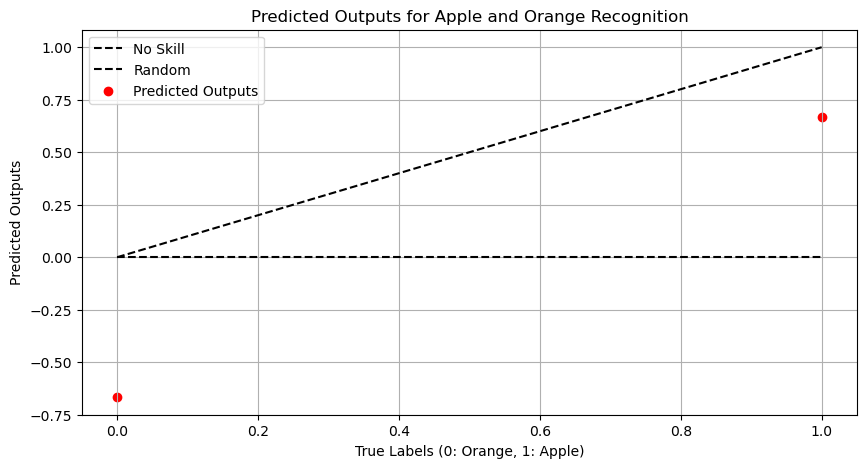

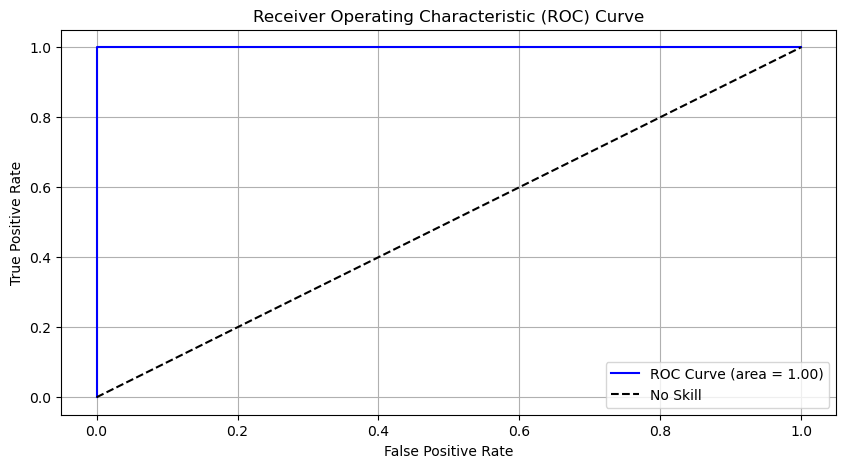

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Step 1: Initialize the Inputs and Targets
p1 = np.array([1, -1, -1])  # Orange
p2 = np.array([1, 1, -1])   # Apple

# Normalize the inputs
def normalize(vector):
    return vector / np.linalg.norm(vector)

p1_normalized = normalize(p1)
p2_normalized = normalize(p2)

# Desired outputs
t1 = -1
t2 = 1

# Prepare target matrix T
T = np.array([[t1], [t2]])  # Shape (2, 1)

# Prepare input matrix P with normalized vectors as columns
P = np.column_stack((p1_normalized, p2_normalized))  # Shape (3, 2)

# Step 3: Calculate the Weight Matrix W
W = T.T @ P.T  # Weight matrix as T^T * P^T, shape (1, 3)

# Step 4: Compute the Outputs
output_p1 = W @ p1_normalized
output_p2 = W @ p2_normalized

# Combine outputs and true labels for ROC
outputs = np.array([output_p1, output_p2])
true_labels = np.array([0, 1])  # 0 for orange, 1 for apple

# Threshold the output to classify (using 0 as threshold)
predicted_labels = (outputs > 0).astype(int).flatten()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot([0, 1], [0, 0], 'k--', label='No Skill')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.scatter(true_labels, outputs.flatten(), label='Predicted Outputs', color='red')
plt.title('Predicted Outputs for Apple and Orange Recognition')
plt.xlabel('True Labels (0: Orange, 1: Apple)')
plt.ylabel('Predicted Outputs')
plt.legend()
plt.grid()
plt.show()

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(true_labels, outputs.flatten())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


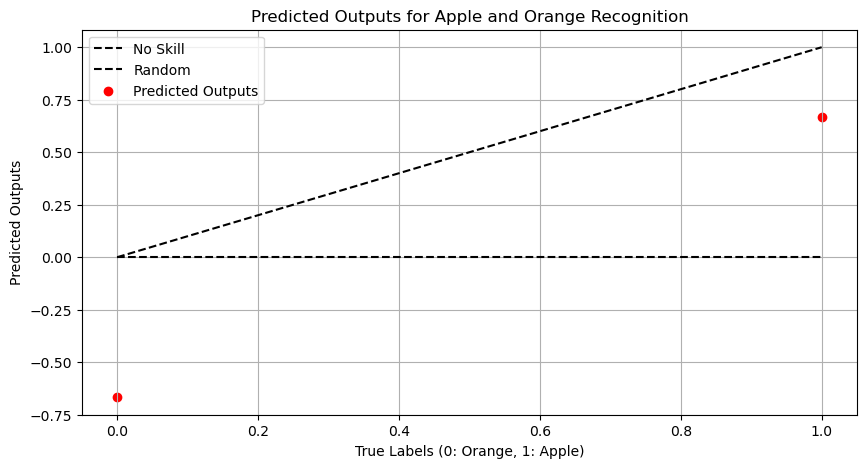

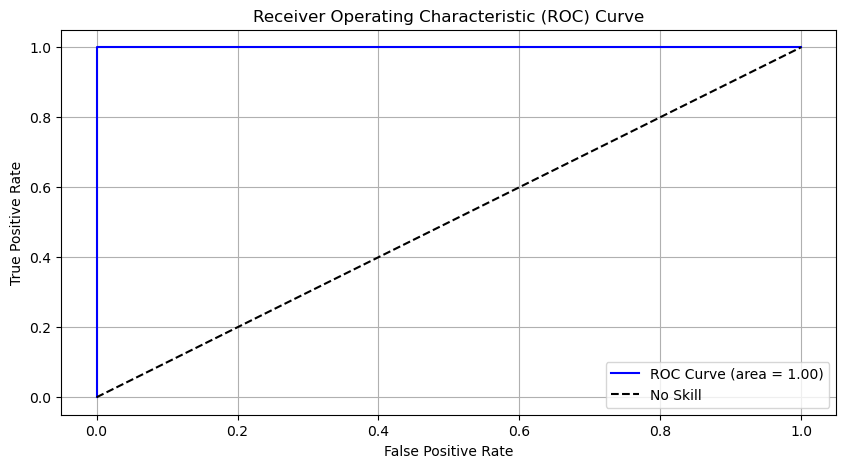

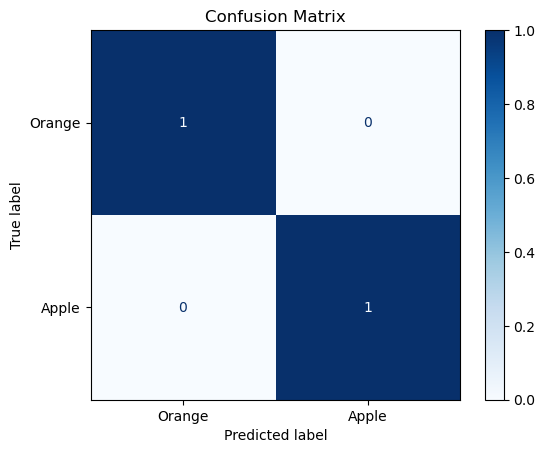

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Initialize the Inputs and Targets
p1 = np.array([1, -1, -1])  # Orange
p2 = np.array([1, 1, -1])   # Apple

# Normalize the inputs
def normalize(vector):
    return vector / np.linalg.norm(vector)

p1_normalized = normalize(p1)
p2_normalized = normalize(p2)

# Desired outputs
t1 = -1
t2 = 1

# Prepare target matrix T
T = np.array([[t1], [t2]])  # Shape (2, 1)

# Prepare input matrix P with normalized vectors as columns
P = np.column_stack((p1_normalized, p2_normalized))  # Shape (3, 2)

# Step 3: Calculate the Weight Matrix W
W = T.T @ P.T  # Weight matrix as T^T * P^T, shape (1, 3)

# Step 4: Compute the Outputs
output_p1 = W @ p1_normalized
output_p2 = W @ p2_normalized

# Combine outputs and true labels for ROC
outputs = np.array([output_p1, output_p2])
true_labels = np.array([0, 1])  # 0 for orange, 1 for apple

# Threshold the output to classify (using 0 as threshold)
predicted_labels = (outputs > 0).astype(int).flatten()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot([0, 1], [0, 0], 'k--', label='No Skill')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.scatter(true_labels, outputs.flatten(), label='Predicted Outputs', color='red')
plt.title('Predicted Outputs for Apple and Orange Recognition')
plt.xlabel('True Labels (0: Orange, 1: Apple)')
plt.ylabel('Predicted Outputs')
plt.legend()
plt.grid()
plt.show()

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(true_labels, outputs.flatten())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Step 5: Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Orange', 'Apple'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Performance Metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Displaying performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


## Pseudoinverse Rule

When the prototype input patterns are not orthogonal, the Hebb rule produces some errors. There are several procedures that can be used to reduce these errors. In this section, we will discuss one of those procedures, the pseudoinverse rule.

Recall that the task of the linear associator was to produce an output of $ t_q $ for an input of $ p_q $. In other words,

$$
\mathbf{W} \mathbf{p}_q = \mathbf{t}_q \quad (q = 1, 2, \ldots, Q). \tag{7.24}
$$

If it is not possible to choose a weight matrix so that these equations are exactly satisfied, then we want them to be approximately satisfied. One approach would be to choose the weight matrix to minimize the following performance index:

$$
F(\mathbf{W}) = \sum_{q=1}^{Q} \left\| \mathbf{t}_q - \mathbf{W} \mathbf{p}_q \right\|^2. \tag{7.25}
$$

If the prototype input vectors $ \mathbf{p}_q $ are orthonormal and we use the Hebb rule to find $ \mathbf{W} $, then $ F(\mathbf{W}) $ will be zero. When the input vectors are not orthogonal and we use the Hebb rule, then \( F(\mathbf{W}) \) will not be zero, and it is not clear that $ F(\mathbf{W}) $ will be minimized.

It turns out that the weight matrix that will minimize $ F(\mathbf{W}) $ is obtained by using the pseudoinverse matrix, which we will define next. First, let’s rewrite Eq. (7.24) in matrix form:

$$
\mathbf{W} \mathbf{P} = \mathbf{T}, \tag{7.26}
$$

where 

$$
\mathbf{T} = 
\begin{bmatrix}
t_1 \\
t_2 \\
\vdots \\
t_Q 
\end{bmatrix} 
\quad \text{and} \quad
\mathbf{P} = 
\begin{bmatrix}
\mathbf{p}_1 & \mathbf{p}_2 & \cdots & \mathbf{p}_Q
\end{bmatrix}. \tag{7.27}
$$

Then Eq. (7.25) can be written as:

$$
F(\mathbf{W}) = \left\| \mathbf{T} - \mathbf{W} \mathbf{P} \right\|^2 = \mathbf{E}, \tag{7.28}
$$

where 

$$
\mathbf{E} = \mathbf{T} - \mathbf{W} \mathbf{P}, \tag{7.29}
$$

and 

$$
\|\mathbf{E}\|^2 = \sum_{i} \sum_{j} e_{ij}. \tag{7.30}
$$

Note that \( F(\mathbf{W}) \) can be made zero if we can solve Eq. (7.26). If the \( \mathbf{P} \) matrix has an inverse, the solution is 

$$
\mathbf{W} = \mathbf{T} \mathbf{P}^{-1}. \tag{7.31}
$$

However, this is rarely possible. Normally the $ \mathbf{p}_q $ vectors (the columns of $ \mathbf{P} $) will be independent, but $ R $ (the dimension of $ \mathbf{p}_q $) will be larger than $ Q $ (the number of $ \mathbf{p}_q $ vectors). Therefore, $ \mathbf{P} $ will not be a square matrix, and no exact inverse will exist.


# Pseudoinverse Rule

It has been shown \cite{Albe72} that the weight matrix that minimizes Eq. (7.25) is given by the pseudoinverse rule:

$$
\mathbf{W} = \mathbf{T} \mathbf{P}^+, \tag{7.32}
$$

where \( \mathbf{P}^+ \) is the Moore-Penrose pseudoinverse. The pseudoinverse of a real matrix \( \mathbf{P} \) is the unique matrix that satisfies:



When the number \( R \) of rows of \( \mathbf{P} \) is greater than the number of columns \( Q \) of \( \mathbf{P} \), and the columns of \( \mathbf{P} \) are independent, then the pseudoinverse can be computed by:

$$
\mathbf{P}^+ = \left( \mathbf{P}^T \mathbf{P} \right)^{-1} \mathbf{P}^T. \tag{7.34}
$$

To test the pseudoinverse rule (Eq. (7.32)), consider again the apple and orange recognition problem. Recall that the input/output prototype vectors are:

$\mathbf{P} \mathbf{P}^+ \mathbf{P} = \mathbf{P}$

$\mathbf{P}^+ \mathbf{P} \mathbf{P}^+ = \mathbf{P}^+$

$(\mathbf{P} \mathbf{P}^+)^T = \mathbf{P} \mathbf{P}^+$

$(\mathbf{P}^+ \mathbf{P})^T = \mathbf{P}^+ \mathbf{P}$

(Note that we do not need to normalize the input vectors when using the pseudoinverse rule.) The weight matrix is calculated from Eq. (7.32):

$$
\begin{pmatrix}
1 & 1 \\
-1 & 1 \\
-1 & -1
\end{pmatrix}
\mathbf{W} = \mathbf{T} \mathbf{P}^+ = 
\begin{pmatrix}
0.25 & -0.5 & -0.25 \\
1 & 0 & 0 \\
0.25 & 0.5 & -0.25
\end{pmatrix}. \tag{7.36}
$$



The pseudoinverse is computed from Eq. (7.34):

$$
\mathbf{P}^+ = \left( \mathbf{P}^T \mathbf{P} \right)^{-1} \mathbf{P}^T = 
\begin{pmatrix}
3 & 1 \\
1 & -1
\end{pmatrix}^{-1} 
\begin{pmatrix}
1 & 1 \\
-1 & -1
\end{pmatrix} = 
\begin{pmatrix}
0.25 & -0.5 & -0.25 \\
1 & 0 & 0 \\
0.25 & 0.5 & -0.25
\end{pmatrix}. \tag{7.37}
$$

This produces the following weight matrix:

$$
\mathbf{W} = \mathbf{T} \mathbf{P}^+ = 
\begin{pmatrix}
0 & 1 & 0 \\
-1 & 1 & 0 \\
0.25 & 0.5 & -0.25
\end{pmatrix}. \tag{7.38}
$$

Let’s try this matrix on our two prototype patterns:

$$
\begin{pmatrix}
1 & 1 \\
-1 & 1 \\
-1 & -1
\end{pmatrix}
\mathbf{W} = \mathbf{T} \mathbf{P}^+ = 
\begin{pmatrix}
0.25 & -0.5 & -0.25 \\
1 & 0 & 0 \\
0.25 & 0.5 & -0.25
\end{pmatrix}. \tag{7.36}
$$


The network outputs exactly match the desired outputs. Compare this result with the performance of the Hebb rule. As you can see from Eq. (7.22) and Eq. (7.23), the Hebbian outputs are only close, while the pseudoinverse rule produces exact results.


In [11]:
# Function to compute the transpose of a matrix
def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

# Function to multiply two matrices
def matrix_multiply(A, B):
    # Number of rows in A
    rows_A = len(A)
    # Number of columns in B
    cols_B = len(B[0])
    # Number of columns in A
    cols_A = len(A[0])
    
    # Initialize the result matrix with zeros
    result = [[0] * cols_B for _ in range(rows_A)]
    
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

# Function to compute the inverse of a 2x2 matrix
def inverse_2x2(matrix):
    a, b = matrix[0]
    c, d = matrix[1]
    det = a * d - b * c
    if det == 0:
        raise ValueError("Matrix is not invertible")
    return [[d / det, -b / det], [-c / det, a / det]]

# Step 1: Define the prototype input/output vectors
# Input vectors (3 rows for the number of features and 2 columns for two prototypes)
P = [[1, 1], 
     [-1, 1], 
     [-1, -1]]

# Desired outputs (2 prototypes)
T = [[-1, 1]]  # T is a 1x2 matrix

# Step 2: Calculate the pseudoinverse of P
# Calculate P^T
P_T = transpose(P)

# Calculate P^T * P
P_T_P = matrix_multiply(P_T, P)

# Calculate the inverse of P^T * P
P_T_P_inv = inverse_2x2(P_T_P)

# Calculate the pseudoinverse using the formula (P^T * P)^(-1) * P^T
P_pseudo_inverse = matrix_multiply(P_T_P_inv, P_T)

# Step 3: Calculate the weight matrix W using the pseudoinverse
# W will be of shape (1, 3)
W = matrix_multiply(T, transpose(P_pseudo_inverse))

# Display the weight matrix
print("Weight matrix W:")
for row in W:
    print(row)

# Step 4: Test the weight matrix with the input vectors
# Reshape inputs to ensure they are in the correct shape for multiplication
p1 = [[P[0][0]], [P[1][0]], [P[2][0]]]  # Test with the first prototype input
p2 = [[P[0][1]], [P[1][1]], [P[2][1]]]  # Test with the second prototype input

output1 = matrix_multiply(W, p1)  # Output for p1
output2 = matrix_multiply(W, p2)  # Output for p2

print("Output for p1:", output1[0][0])  # Expected: -1
print("Output for p2:", output2[0][0])  # Expected: 1


Weight matrix W:
[-0.75, 0.25]
Output for p1: -1.0
Output for p2: -0.5
